In [255]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import dtype

In [241]:
path = '../data/data.xlsx'
tab_name = ' Nils'
separator = ';'  # in case comma for smth else is used already and messes with splitting

df = pd.read_excel(path,sheet_name=tab_name)
df.columns = df.iloc[[0], :].to_csv(header=False, index=False, sep=separator).split(separator)  # rename columns from first row
df = df.iloc[1:,:-30]  # drop first row, since its col names only
for colname in list(df.columns):
    df[colname] =  df[colname].replace('-',np.nan)

df

,Nr,Pat,ID,Kürzel,OP-Datum,Abstand OP- zum heutigen Tag (Datum in Zelle F1),Geschlecht,Alter,R/L (FA markieren),IOL [dpt],...,-2.5,-2.0,-1.5,-1.0,-0.5,0.0,0.5,1,1.5,2
1,1,NaN,6126,WR,2020-09-22 00:00:00,"19 Monate, 27 Tage",w,54,L,19,...,0.20,0.16,0.02,0.02,-0.06,-0.02,0.34,0.48,0.54,0.80
2,73,NaN,6126,WR,2021-08-31 00:00:00,"8 Monate, 18 Tage",w,54,R,20,...,0.12,0.04,-0.08,0.00,-0.10,0.02,0.44,0.50,0.74,0.78
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bino,NaN,...,0.04,-0.04,-0.06,0.00,-0.04,-0.04,0.30,0.54,0.64,0.80
4,24,NaN,6413,RJ,2021-03-30 00:00:00,"13 Monate, 19 Tage",m,67,L,15.5,...,0.16,0.16,0.08,0.08,0.06,0.12,0.20,0.30,0.54,0.66
5,43,NaN,6413,RJ,2021-06-01 00:00:00,"11 Monate, 18 Tage",m,67,R,18,...,0.02,0.04,0.02,0.06,-0.08,0.06,0.20,0.34,0.58,0.68
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bino,NaN,...,0.02,0.02,-0.08,-0.10,-0.10,-0.02,0.06,0.26,0.54,0.58
7,110,NaN,6464,AF,2021-11-16 00:00:00,"6 Monate, 3 Tage",m,57,LA,26,...,0.26,0.10,0.14,0.00,-0.02,0.14,0.36,0.72,0.82,NaN
8,133,NaN,6464,AF,2022-01-11 00:00:00,"4 Monate, 8 Tage",m,57,RA,25.5,...,0.10,0.04,-0.06,0.02,0.14,0.56,0.76,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bino,NaN,...,0.02,-0.06,-0.10,-0.02,0.02,0.12,0.22,0.72,0.80,NaN
10,25,NaN,6479,HW,2021-04-13 00:00:00,"13 Monate, 6 Tage",m,67,R,17,...,0.02,0.02,-0.02,-0.10,-0.08,0.20,0.30,0.42,0.46,0.60


In [242]:
unique_ids = sorted(list(set(list(df['ID'])))[1:])
unique_ids

[6126, 6413, 6464, 6479, 6480, 6662, 6705, 6757, 6801]

In [244]:
def get_mean_std_from_col_and_side(colname, side, df=df):
    _df = pd.DataFrame()
    if side in ['l', 'L', 'la', 'La', 'LA', 'left', 'links']:
        _df = df[(df['R/L (FA markieren)'] == 'L') | (df['R/L (FA markieren)'] == 'LA')]
    elif side in ['b', 'B', 'ba', 'Ba', 'BA', 'both', 'bino', 'Bino', 'BINO']:
        _df = df[df['R/L (FA markieren)'] == 'Bino']
    else:
        _df = df[(df['R/L (FA markieren)'] == 'R') | (df['R/L (FA markieren)'] == 'RA')]

    col = np.array(_df[colname], dtype=np.float64)
    mean = np.mean(col)
    std = np.std(col)

    return mean, std

agemean, agestd = get_mean_std_from_col_and_side('Alter','R')
agemean, agestd

(58.22222222222222, 6.476929618573187)

In [245]:
for colname in list(df.iloc[:,31:].columns):
    df[colname] =  df[colname].replace('-',pd.NA)

side_meanstd_dict = {'L': [], 'R':[], 'Bino': []}

for side in ['L', 'R', 'Bino']:
    print(f'Side: {side}\n--------------')
    for visus in list(df.iloc[:,31:].columns):
        mean, std = get_mean_std_from_col_and_side(visus,side)
        side_meanstd_dict[side].append((mean,std))
        print(f'Visus: {visus}\nMean: {mean} | Std: {std}')
    print('--------------')

Side: L
--------------
Visus: -5
Mean: nan | Std: nan
Visus: -4.5
Mean: nan | Std: nan
Visus: -4
Mean: nan | Std: nan
Visus: -3.5
Mean: 0.5666666666666667 | Std: 0.187142251301576
Visus: -3.0
Mean: 0.3955555555555555 | Std: 0.12175668917157978
Visus: -2.5
Mean: 0.21333333333333335 | Std: 0.132664991614216
Visus: -2.0
Mean: 0.14222222222222222 | Std: 0.07145748973694901
Visus: -1.5
Mean: 0.10222222222222223 | Std: 0.05845753972429291
Visus: -1.0
Mean: 0.05333333333333334 | Std: 0.06110100926607787
Visus: -0.5
Mean: -0.01111111111111111 | Std: 0.043319085976928726
Visus: 0.0
Mean: 0.02888888888888889 | Std: 0.07370277311900889
Visus: 0.5
Mean: 0.21111111111111114 | Std: 0.10202880251776886
Visus: 1
Mean: 0.42888888888888893 | Std: 0.15975289560543493
Visus: 1.5
Mean: 0.5777777777777778 | Std: 0.16798001056857118
Visus: 2
Mean: nan | Std: nan
--------------
Side: R
--------------
Visus: -5
Mean: nan | Std: nan
Visus: -4.5
Mean: 0.6477777777777778 | Std: 0.13966450099973926
Visus: -4
Mean:

In [252]:
side = 'Bino'

y_mean, y_std = zip(* (side_meanstd_dict[side]))
x = np.linspace(-5.0,2.0,15, endpoint=True)
y_mean = np.array(y_mean)
y_std = np.array(y_std)
y_mean

array([        nan,  0.57777778,  0.52444444,  0.34888889,  0.18444444,
        0.04666667,  0.        , -0.03333333, -0.06      , -0.07555556,
       -0.04222222,  0.12      ,  0.33777778,  0.47111111,         nan])

In [ ]:
plt.plot(x,y_mean,label='Mean')
plt.axis()
plt.plot(x,y_mean-y_std,label='Std',color='g')
plt.plot(x,y_mean+y_std,color='g')
plt.ylim([0.8,-0.2])
plt.legend()
plt.savefig(f'/Users/nilsseitz/Downloads/fig_{side}.png')
plt.show()

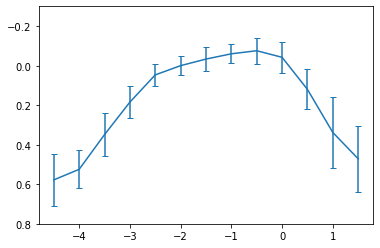

In [289]:
plt.errorbar(x, y_mean, y_std, capsize = 3)
plt.ylim([0.8,-0.3])
plt.savefig(f'/Users/nilsseitz/Downloads/fig_std_{side}.png')
plt.show()

In [272]:
dataframe = pd.DataFrame()
y_mean, y_std = zip(*(side_meanstd_dict[side]))
x = np.linspace(-5.0,2.0,15, endpoint=True)
y_mean = np.array(y_mean)
y_std = np.array(y_std)
for data in zip(x,y_mean,y_std):
    dataframe = dataframe.append(pd.Series(data), ignore_index=True)

dataframe.to_csv(f'/Users/nilsseitz/Downloads/tab_{side}.csv')
dataframe

,0,1,2
0,-5.0,NaN,NaN
1,-4.5,0.577778,0.130450
2,-4.0,0.524444,0.095581
3,-3.5,0.348889,0.109183
4,-3.0,0.184444,0.082612
5,-2.5,0.046667,0.055777
6,-2.0,0.000000,0.048074
7,-1.5,-0.033333,0.062539
8,-1.0,-0.060000,0.048990
9,-0.5,-0.075556,0.065847
